In [1]:
import datetime
now = datetime.datetime.now()
print ("Current date and time: ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time: 
2022-08-01 17:00:14


In [2]:
# installing dependencies
#
import pandas as pd
import os
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd

#### ECOSTRESS EVAPOTRANSPIRATION FROM APPEARS WEBSITE

### JJA 2020

##### Read in ECO3ETPTJPL-001-Statistics.csv

In [3]:
# read in CSV file for each winter
#
ET_stats_2020 = pd.read_csv ("ECO3ETPTJPL-001-Statistics_S2020.csv", index_col='Date', parse_dates=True)
pd.set_option('display.max_columns', None)
ET_stats_2020.head()

,File Name,Dataset,aid,Orbit Number,Scene ID,Build ID,Orbit Correction Performed,Count,Minimum,Maximum,Range,Mean,Standard Deviation,Variance,Upper Quartile,Upper 1.5 IQR,Median,Lower 1.5 IQR,Lower Quartile
Date,,,,,,,,,,,,,,,,,,,
2020-06-01 08:34:50+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,10799,5,601,True,88796,0.171132,45.021114,"(0.1711317,45.0211143)",7.559912,8.592816,73.836493,8.142088,17.185648,4.537195,0.171132,2.111110
2020-06-01 08:35:42+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,10799,6,601,True,25006478,0.001828,322.510406,"(0.001828,322.5104065)",26.375839,48.339844,2336.740494,27.005777,66.722305,5.459802,0.001828,0.527958
2020-06-01 08:36:34+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,10799,7,601,True,28834650,0.035407,362.190247,"(0.0354073,362.1902466)",50.260387,52.228458,2727.811867,73.770073,168.835144,32.848412,0.035407,10.393354
2020-06-01 08:37:26+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,10799,8,601,True,12445397,2.670215,340.872955,"(2.6702147,340.8729553)",73.231522,66.592743,4434.593410,92.572998,187.994904,44.586525,2.670215,28.958334
2020-06-01 08:38:18+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,10799,9,601,True,4248077,12.205633,265.618042,"(12.2056332,265.618042)",63.345615,27.012350,729.667057,73.689568,113.738953,58.190685,12.205633,46.989910


In [4]:
ET_stats_2020.dtypes

File Name                      object
Dataset                        object
aid                            object
Orbit Number                    int64
Scene ID                        int64
Build ID                        int64
Orbit Correction Performed       bool
Count                           int64
Minimum                       float64
Maximum                       float64
Range                          object
Mean                          float64
Standard Deviation            float64
Variance                      float64
Upper Quartile                float64
Upper 1.5 IQR                 float64
Median                        float64
Lower 1.5 IQR                 float64
Lower Quartile                float64
dtype: object

In [5]:
mean_S20 = ET_stats_2020['Mean']
mean_S20

Date
2020-06-01 08:34:50+00:00      7.559912
2020-06-01 08:35:42+00:00     26.375839
2020-06-01 08:36:34+00:00     50.260387
2020-06-01 08:37:26+00:00     73.231522
2020-06-01 08:38:18+00:00     63.345615
                                ...    
2020-08-30 23:45:36+00:00    238.607040
2020-08-31 01:22:08+00:00    120.568665
2020-08-31 22:54:58+00:00    805.411316
2020-08-31 22:55:49+00:00    304.998169
2020-08-31 22:56:41+00:00    395.580078
Name: Mean, Length: 358, dtype: float64

In [6]:
mean_S20 = pd.DataFrame(mean_S20)
mean_S20

,Mean
Date,
2020-06-01 08:34:50+00:00,7.559912
2020-06-01 08:35:42+00:00,26.375839
2020-06-01 08:36:34+00:00,50.260387
2020-06-01 08:37:26+00:00,73.231522
2020-06-01 08:38:18+00:00,63.345615
...,...
2020-08-30 23:45:36+00:00,238.607040
2020-08-31 01:22:08+00:00,120.568665
2020-08-31 22:54:58+00:00,805.411316


<AxesSubplot:xlabel='Date'>

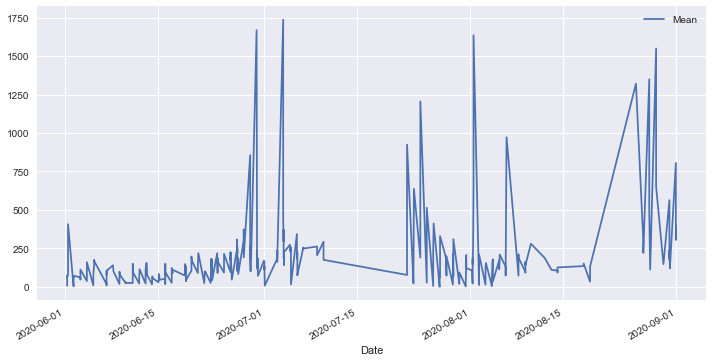

In [7]:
plt.style.use('seaborn')
mean_S20.plot(figsize= (12, 6))

In [8]:
mean_S20.to_csv('mean_S2019.csv')
print('new csv file was created... ')

new csv file was created... 


<AxesSubplot:xlabel='Date'>

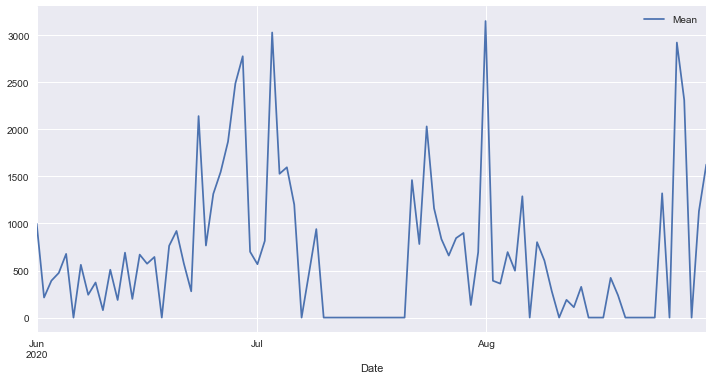

In [9]:
#Daily sum of means
mean_S20.resample('D').sum().plot(figsize= (12, 6))

<AxesSubplot:xlabel='Date'>

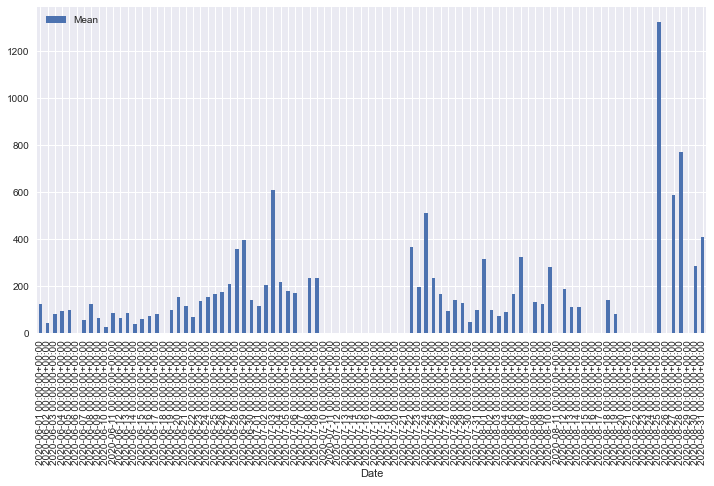

In [10]:
# Daily mean of means
#
mean_S20.resample('D').mean().plot(figsize= (12, 6), kind='bar')

<AxesSubplot:xlabel='Date'>

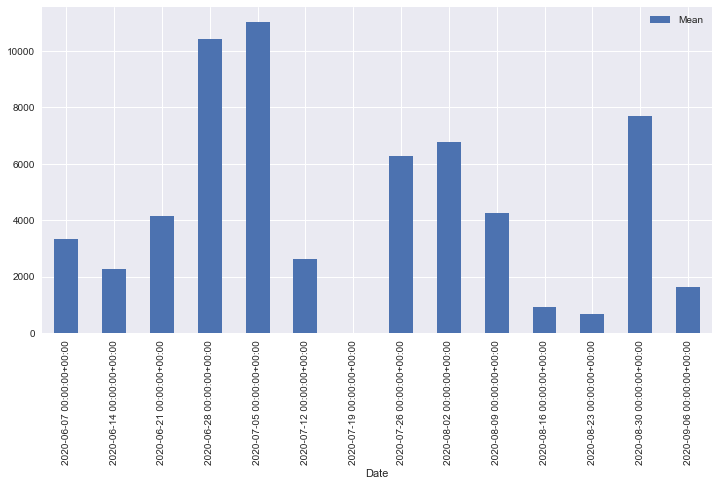

In [11]:
#Weekly sum of means bar
#
mean_S20.resample('W').sum().plot(figsize= (12, 6), kind='bar')

---

<AxesSubplot:xlabel='Date'>

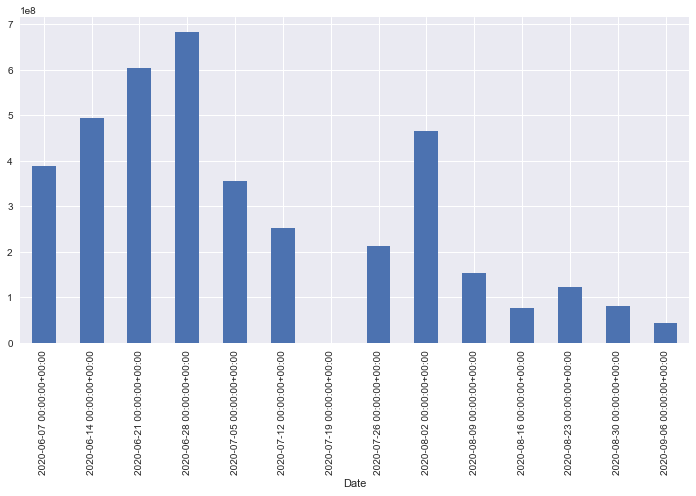

In [13]:
# Weekly sum of counts bar
#
ET_stats_2020['Count'].resample('W').sum().plot(figsize= (12, 6), kind='bar')

<AxesSubplot:xlabel='time'>

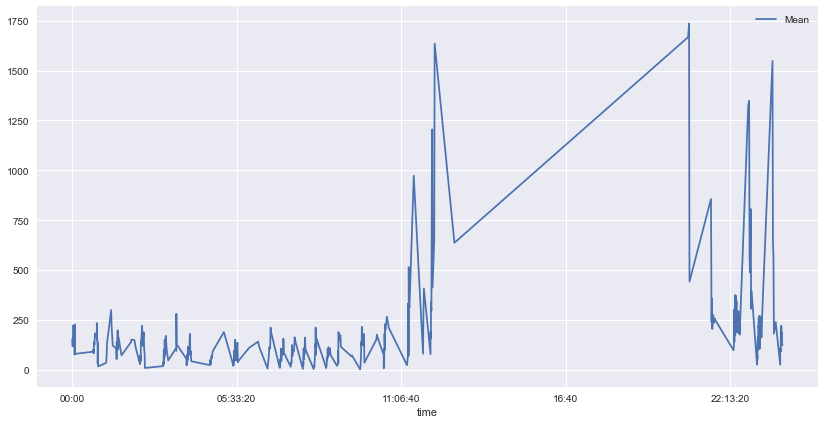

In [14]:
mean_S20.groupby(mean_S20.index.time).mean().plot(figsize= (14, 7))

In [15]:
pivoted_mean = mean_S20.pivot_table('Mean', index=mean_S20.index.time, columns=mean_S20.index.date)
pivoted_mean

,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-08,2020-07-09,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-08,2020-08-09,2020-08-10,2020-08-12,2020-08-13,2020-08-14,2020-08-18,2020-08-19,2020-08-25,2020-08-27,2020-08-28,2020-08-30,2020-08-31
00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.674118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:00:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.649864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:01:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.628021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:02:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.914948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:02:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.883758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:56:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220.037293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23:57:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.500412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23:58:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.217483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23:58:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.672569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='time'>

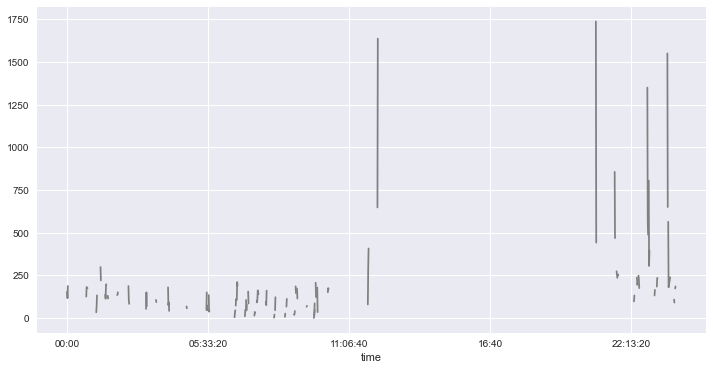

In [16]:
pivoted_mean.plot(legend=False,figsize= (12, 6), color='grey')

In [17]:
pivoted_count = ET_stats_2020.pivot_table('Count', index=ET_stats_2020.index.time, columns=ET_stats_2020.index.date)
pivoted_count

,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-08,2020-07-09,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-08,2020-08-09,2020-08-10,2020-08-12,2020-08-13,2020-08-14,2020-08-18,2020-08-19,2020-08-25,2020-08-27,2020-08-28,2020-08-30,2020-08-31
00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17762995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:00:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7740311.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:01:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3379072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:02:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18066429.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:02:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27269830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:56:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2777172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23:57:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6498475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23:58:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1223757.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23:58:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18716827.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='time'>

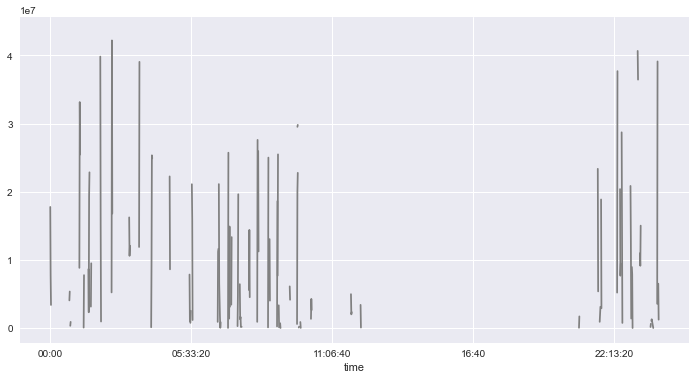

In [18]:
pivoted_count.plot(legend=False,figsize= (12, 6), color='grey')

---

In [19]:
ET_stats_2020

,File Name,Dataset,aid,Orbit Number,Scene ID,Build ID,Orbit Correction Performed,Count,Minimum,Maximum,Range,Mean,Standard Deviation,Variance,Upper Quartile,Upper 1.5 IQR,Median,Lower 1.5 IQR,Lower Quartile
Date,,,,,,,,,,,,,,,,,,,
2020-06-01 08:34:50+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,10799,5,601,True,88796,0.171132,45.021114,"(0.1711317,45.0211143)",7.559912,8.592816,73.836493,8.142088,17.185648,4.537195,0.171132,2.111110
2020-06-01 08:35:42+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,10799,6,601,True,25006478,0.001828,322.510406,"(0.001828,322.5104065)",26.375839,48.339844,2336.740494,27.005777,66.722305,5.459802,0.001828,0.527958
2020-06-01 08:36:34+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,10799,7,601,True,28834650,0.035407,362.190247,"(0.0354073,362.1902466)",50.260387,52.228458,2727.811867,73.770073,168.835144,32.848412,0.035407,10.393354
2020-06-01 08:37:26+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,10799,8,601,True,12445397,2.670215,340.872955,"(2.6702147,340.8729553)",73.231522,66.592743,4434.593410,92.572998,187.994904,44.586525,2.670215,28.958334
2020-06-01 08:38:18+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,10799,9,601,True,4248077,12.205633,265.618042,"(12.2056332,265.618042)",63.345615,27.012350,729.667057,73.689568,113.738953,58.190685,12.205633,46.989910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 23:45:36+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,12204,8,601,True,221,231.357895,295.926575,"(231.3578949,295.9265747)",238.607040,11.199500,125.428802,238.138824,240.260452,237.125046,231.357895,235.037445
2020-08-31 01:22:08+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,12205,8,601,True,27330714,34.257641,298.684174,"(34.2576408,298.6841736)",120.568665,39.114983,1529.981864,148.058807,235.127609,113.902088,34.257641,90.012697
2020-08-31 22:54:58+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,12219,2,601,True,8946143,172.895523,1999.996216,"(172.8955231,1999.9962158)",805.411316,406.220825,165015.358800,1086.614319,1999.996216,683.556885,172.895523,476.372757


In [21]:
mean_S20.describe()

,Mean
count,358.000000
mean,173.031450
std,231.073730
min,0.746154
25%,67.439234
50%,114.652340
75%,192.024956
max,1736.231812


In [49]:
# Calculate a z-score from a provided mean and standard deviation
# how far away from the mean a given value is
import statistics
mean = 173.031450
standard_deviation = 231.073730

zscore = statistics.NormalDist(mean, standard_deviation).zscore(5)
print(zscore)

-0.7271767760013221


In [51]:
# Calculate the z-score from with scipy
import scipy.stats as stats
values = mean_S20

zscores = stats.zscore(values)
print(zscores)

                               Mean
Date                               
2020-06-01 08:34:50+00:00 -0.717101
2020-06-01 08:35:42+00:00 -0.635558
2020-06-01 08:36:34+00:00 -0.532050
2020-06-01 08:37:26+00:00 -0.432501
2020-06-01 08:38:18+00:00 -0.475343
...                             ...
2020-08-30 23:45:36+00:00  0.284184
2020-08-31 01:22:08+00:00 -0.227357
2020-08-31 22:54:58+00:00  2.740532
2020-08-31 22:55:49+00:00  0.571902
2020-08-31 22:56:41+00:00  0.964455

[358 rows x 1 columns]


In [53]:
zscores.max()

Mean    6.77441
dtype: float64

In [54]:
zscores.min()

Mean   -0.746629
dtype: float64